In [1]:
# ============================================
# 1. Imports & Settings
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
# ============================================
# 2. Load & Combine CSV Files
# ============================================
paths = [
    "api_data_aadhar_biometric/api_data_aadhar_biometric_0_500000.csv",
    "api_data_aadhar_biometric/api_data_aadhar_biometric_500000_1000000.csv",
    "api_data_aadhar_biometric/api_data_aadhar_biometric_1000000_1500000.csv",
    "api_data_aadhar_biometric/api_data_aadhar_biometric_1500000_1861108.csv"
]

dfs = [pd.read_csv(p) for p in paths]
df = pd.concat(dfs, ignore_index=True)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1861108, 6)


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [4]:
# ============================================
# 3. Basic Structure & Data Quality
# ============================================
print("\n--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isna().sum())

print("\n--- Duplicate Rows ---")
print(df.duplicated().sum())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB
None

--- Missing Values ---
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

--- Duplicate Rows ---
94896


In [5]:
# ============================================
# 4. Date Parsing (Mixed Formats Safe)
# ============================================
df["date"] = pd.to_datetime(
    df["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)

assert df["date"].notna().all(), "Unparseable dates found!"

In [6]:
# ============================================
# 5. Feature Engineering
# ============================================
df["bio_total"] = df["bio_age_5_17"] + df["bio_age_17_"]

In [7]:
# ============================================
# 6. State Cleaning (Consistency)
# ============================================
def clean_state(state):
    state = str(state).upper()
    state = state.replace("&", "AND")
    state = re.sub(r"[^A-Z ]", "", state)
    state = re.sub(r"\s+", " ", state)
    state = re.sub(r"^THE\s+", "", state)
    return state.strip()

df = df.copy()
df["state"] = df["state"].apply(clean_state)

state_fix_map = {
    "WESTBENGAL": "WEST BENGAL",
    "WEST BANGAL": "WEST BENGAL",
    "WEST BENGAL": "WEST BENGAL",
}

df["state"] = df["state"].replace(state_fix_map)

In [8]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,bio_total
0,2025-03-01,HARYANA,Mahendragarh,123029,280,577,857
1,2025-03-01,BIHAR,Madhepura,852121,144,369,513
2,2025-03-01,JAMMU AND KASHMIR,Punch,185101,643,1091,1734
3,2025-03-01,BIHAR,Bhojpur,802158,256,980,1236
4,2025-03-01,TAMIL NADU,Madurai,625514,271,815,1086



--- Numerical Summary ---
       bio_age_5_17  bio_age_17_  bio_total
count    1861108.00   1861108.00 1861108.00
mean          18.39        19.09      37.48
std           83.70        88.07     162.33
min            0.00         0.00       0.00
25%            1.00         1.00       3.00
50%            3.00         4.00       8.00
75%           11.00        10.00      22.00
max         8002.00      7625.00   13381.00


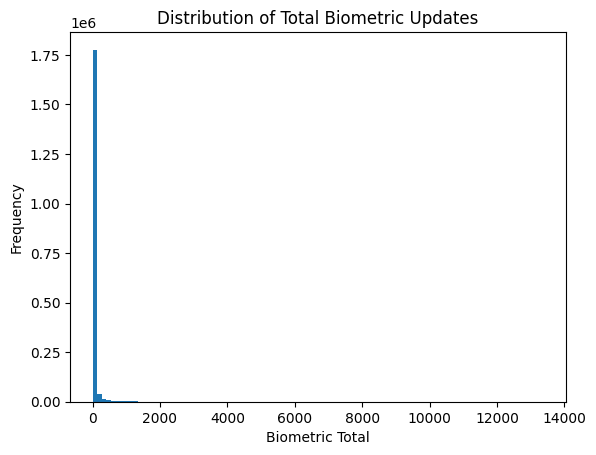

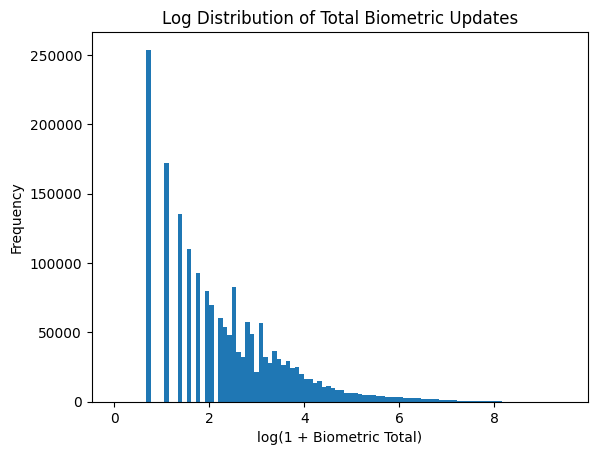

In [9]:
# ============================================
# 7. Descriptive Statistics
# ============================================
print("\n--- Numerical Summary ---")
print(df[["bio_age_5_17", "bio_age_17_", "bio_total"]].describe())


# ============================================
# 8. Distribution Analysis
# ============================================
plt.figure()
plt.hist(df["bio_total"], bins=100)
plt.title("Distribution of Total Biometric Updates")
plt.xlabel("Biometric Total")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(np.log1p(df["bio_total"]), bins=100)
plt.title("Log Distribution of Total Biometric Updates")
plt.xlabel("log(1 + Biometric Total)")
plt.ylabel("Frequency")
plt.show()

In [20]:
df_copy = df

In [21]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,bio_total,bio_velocity,bio_zscore
775,2025-03-01,DELHI,New Delhi,110001,181,159,340,0.00,1.86
2279,2025-03-01,DELHI,Central Delhi,110001,10,88,98,-242.00,0.37
29131,2025-04-01,DELHI,New Delhi,110001,223,163,386,288.00,2.15
46377,2025-05-01,DELHI,New Delhi,110001,144,163,307,-79.00,1.66
75528,2025-06-01,DELHI,New Delhi,110001,121,164,285,-22.00,1.52


In [22]:
import seaborn as sns

/var/folders/zv/n_w2gt8n32l8wmwk5lylj1b40000gn/T/ipykernel_99926/833045205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_df.head(15), x='bio_total', y='state', palette='magma')


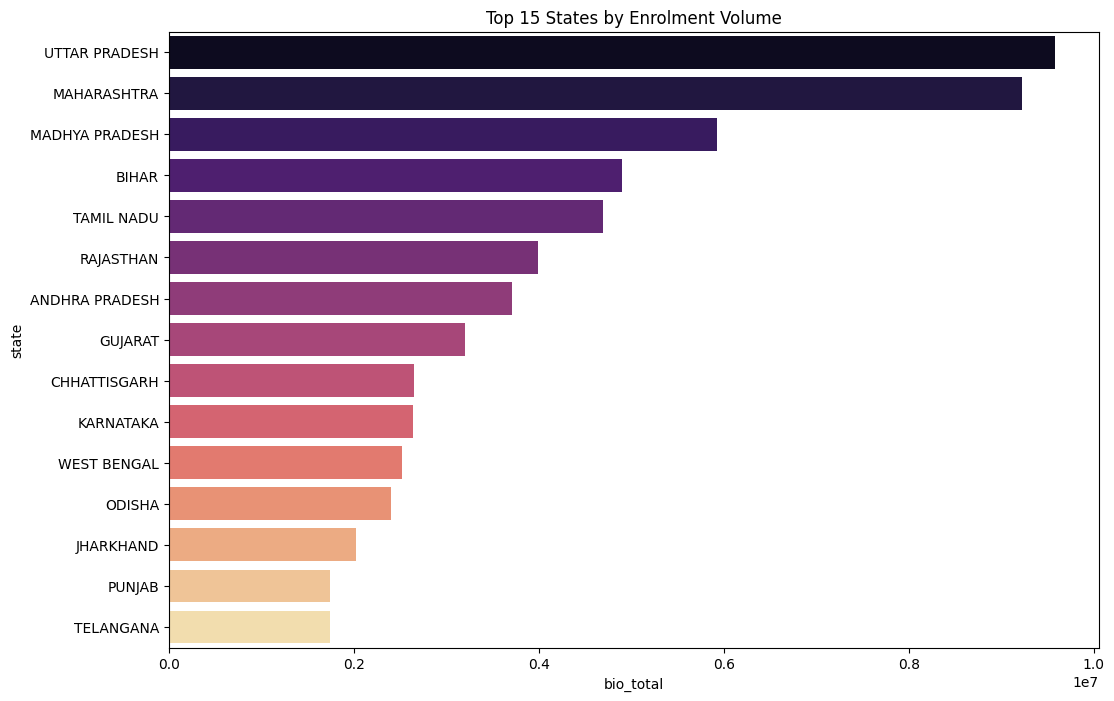

In [24]:
# B. State-wise Distribution: Identify high-activity regions
state_df = df_copy.groupby('state')['bio_total'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=state_df.head(15), x='bio_total', y='state', palette='magma')
plt.title('Top 15 States by Enrolment Volume')
plt.savefig('state_distribution.png')

In [10]:
# ============================================
# 9. Zero & Extreme Values
# ============================================
print("\n--- Zero Biometric Rows ---")
print((df["bio_total"] == 0).sum())

print("\n--- 99th Percentile Threshold ---")
print(df["bio_total"].quantile(0.99))


--- Zero Biometric Rows ---
12

--- 99th Percentile Threshold ---
629.0


In [11]:
# ============================================
# 10. State-wise Aggregation
# ============================================
state_bio = (
    df.groupby("state", as_index=False)["bio_total"]
      .sum()
      .sort_values("bio_total", ascending=False)
)

print("\n--- State-wise Biometric Updates (Top 15) ---")
print(state_bio.head(15))


--- State-wise Biometric Updates (Top 15) ---
             state  bio_total
39   UTTAR PRADESH    9577735
23     MAHARASHTRA    9226139
22  MADHYA PRADESH    5923771
4            BIHAR    4897587
35      TAMIL NADU    4698117
33       RAJASTHAN    3994955
1   ANDHRA PRADESH    3714633
13         GUJARAT    3196514
7     CHHATTISGARH    2648729
18       KARNATAKA    2635954
42     WEST BENGAL    2524619
28          ODISHA    2402877
17       JHARKHAND    2026297
32          PUNJAB    1739671
37       TELANGANA    1737654


In [13]:
# ============================================
# 11. District-wise Aggregation (Top 20)
# ============================================
district_bio = (
    df.groupby(["state", "district"], as_index=False)["bio_total"]
      .sum()
      .sort_values("bio_total", ascending=False)
)

print("\n--- District-wise Biometric Updates (Top 20) ---")
district_bio.head(20)


--- District-wise Biometric Updates (Top 20) ---


,state,district,bio_total
539,MAHARASHTRA,Pune,605762
535,MAHARASHTRA,Nashik,576606
548,MAHARASHTRA,Thane,571273
523,MAHARASHTRA,Jalgaon,417384
230,GUJARAT,Ahmedabad,405490
527,MAHARASHTRA,Mumbai,404359
502,MAHARASHTRA,Ahmadnagar,363561
749,RAJASTHAN,Jaipur,355884
531,MAHARASHTRA,Nagpur,350923
27,ANDHRA PRADESH,Kurnool,350633


In [14]:
# ============================================
# 12. Pincode Concentration Check
# ============================================
print("\n--- Pincode Record Count ---")
print(df["pincode"].value_counts().describe())


--- Pincode Record Count ---
count   19707.00
mean       94.44
std        43.92
min         1.00
25%        76.00
50%        82.00
75%       103.00
max       474.00
Name: count, dtype: float64


In [15]:
# ============================================
# 13. Velocity Preparation (Time-Series Ready)
# ============================================
df = df.sort_values(["pincode", "date"])

df["bio_velocity"] = (
    df.groupby("pincode")["bio_total"].diff()
)

df["bio_velocity"] = df["bio_velocity"].fillna(0)

In [16]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,bio_total,bio_velocity
775,2025-03-01,DELHI,New Delhi,110001,181,159,340,0.00
2279,2025-03-01,DELHI,Central Delhi,110001,10,88,98,-242.00
29131,2025-04-01,DELHI,New Delhi,110001,223,163,386,288.00
46377,2025-05-01,DELHI,New Delhi,110001,144,163,307,-79.00
75528,2025-06-01,DELHI,New Delhi,110001,121,164,285,-22.00


In [17]:
# ============================================
# 14. Velocity Statistics
# ============================================
print("\n--- Biometric Velocity Summary ---")
print(df["bio_velocity"].describe())


--- Biometric Velocity Summary ---
count   1861108.00
mean         -3.80
std         116.00
min      -11931.00
25%          -5.00
50%           0.00
75%           5.00
max       11673.00
Name: bio_velocity, dtype: float64


In [18]:
# ============================================
# 15. Z-Score (Anomaly Detection Prep)
# ============================================
df["bio_zscore"] = (
    (df["bio_total"] - df["bio_total"].mean())
    / df["bio_total"].std()
)

print("\n--- Biometric Z-Score Summary ---")
print(df["bio_zscore"].describe())


--- Biometric Z-Score Summary ---
count   1861108.00
mean         -0.00
std           1.00
min          -0.23
25%          -0.21
50%          -0.18
75%          -0.10
max          82.20
Name: bio_zscore, dtype: float64


In [19]:
# ============================================
# 16. Save Clean Outputs (Optional)
# ============================================
df.to_csv("cleaned_aadhar_biometric_eda.csv", index=False)
state_bio.to_csv("state_biometric_summary.csv", index=False)